## 💻 환경 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import sys

import geopy
from tqdm import tqdm

from pycaret.regression import *

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

>주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

> pandas 작업 중 tqdm을 사용하기 위해 다음과 같은 설정을 합니다.

In [3]:
tqdm.pandas()

>복원성을 위해 아래 random_state를 상수로 고정합니다.

In [4]:
RANDOM_STATE= 0
np.random.seed(RANDOM_STATE)

##  💻데이터 불러오기 

In [5]:
df = pd.read_csv('./NYC_taxi') 

In [6]:
df.head()

zip_code          pickup_hour  month  day  weekday  hour  is_weekend  cnt
0     11106  2015-01-01 00:00:00      1    1        3     0           0   75
1     10006  2015-01-01 00:00:00      1    1        3     0           0   64
2     11201  2015-01-01 00:00:00      1    1        3     0           0  169
3     11430  2015-01-01 00:00:00      1    1        3     0           0  222
4     10032  2015-01-01 00:00:00      1    1        3     0           0   64

# EDA 개요
### 1) 데이터 파악 및 이상유무 확인 
- 기본적인 통계량과 분포 확인
- 어떤 데이터인가?  
- 결측치, 이상치는 없는가? 

### 2) 인사이트 도출 
- 다양한 각도에서 데이터를 분석&시각화 
- 분석결과를 해석해보기, 왜 그럴까?
- 해석결과 활용방안 생각해보기, 어떻게 활용할 수 있을까?

 - ex) 1월 수요변화추이, 시간대별/요일별 트렌드, 가장 수요가 많은 지역은? 
 - ex) 추세선 그리기, 그룹별 막대그래프 찍어보기, 2가지 축으로 히트맵 그려보기 



## 💻1. 데이터 파악 및 이상유무 확인

In [7]:
df.shape

(87020, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   zip_code     87020 non-null  int64 
 1   pickup_hour  87020 non-null  object
 2   month        87020 non-null  int64 
 3   day          87020 non-null  int64 
 4   weekday      87020 non-null  int64 
 5   hour         87020 non-null  int64 
 6   is_weekend   87020 non-null  int64 
 7   cnt          87020 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 5.3+ MB


> 결측치가 하나도 없습니다.

In [9]:
df['zip_code'].describe()

count    87020.000000
mean     10567.760296
std        579.688987
min      10001.000000
25%      10032.000000
50%      10177.000000
75%      11217.000000
max      14801.000000
Name: zip_code, dtype: float64

In [10]:
df['zip_code'].value_counts()

10019    744
10028    744
10002    743
10036    743
10128    743
10065    743
10029    743
10021    743
10010    743
10022    743
11104    742
10003    742
11101    742
10023    742
10014    742
10013    742
10017    742
10025    741
10016    741
10018    741
10024    741
10011    741
10012    741
10075    741
10009    741
10035    740
10026    740
10001    740
10031    739
11377    739
11106    739
11102    739
10038    739
10280    738
10027    738
10007    738
11201    738
10004    737
11211    737
10020    737
11217    737
10119    737
11430    737
10032    736
10006    736
10005    736
11215    736
11103    735
11231    734
10199    733
10030    733
10170    733
10282    732
11222    730
10110    725
10174    724
11105    723
11205    722
10168    721
10165    719
10153    718
11238    717
10037    715
10103    714
10172    713
11372    713
10171    712
11373    709
11371    707
10069    705
10152    705
10167    697
11369    693
10154    693
10451    693
10033    693
11370    689

In [11]:
df['zip_code'].value_counts().describe()

count    374.000000
mean     232.673797
std      301.011504
min        1.000000
25%        4.000000
50%       29.000000
75%      588.000000
max      744.000000
Name: zip_code, dtype: float64

<AxesSubplot:xlabel='zip_code', ylabel='Count'>

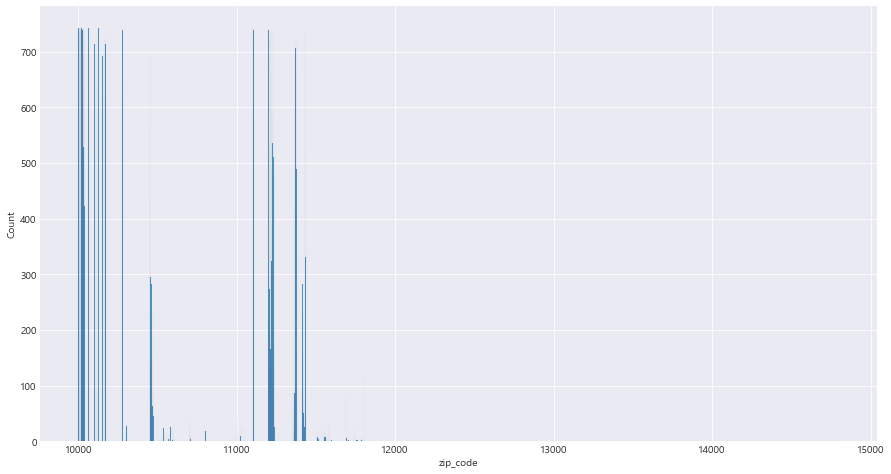

In [13]:
plt.figure(figsize=(15,8))
sns.histplot(x='zip_code', data=df, discrete=True)

> zip_code는 총 374 개의 값이 있으며, 분포에 꽤 차이가 있습니다.

In [14]:
df['zip_code'].value_counts().loc[df['zip_code'].value_counts() > 100]

10019    744
10028    744
10002    743
10036    743
10128    743
10065    743
10029    743
10021    743
10010    743
10022    743
11104    742
10003    742
11101    742
10023    742
10014    742
10013    742
10017    742
10025    741
10016    741
10018    741
10024    741
10011    741
10012    741
10075    741
10009    741
10035    740
10026    740
10001    740
10031    739
11377    739
11106    739
11102    739
10038    739
10280    738
10027    738
10007    738
11201    738
10004    737
11211    737
10020    737
11217    737
10119    737
11430    737
10032    736
10006    736
10005    736
11215    736
11103    735
11231    734
10199    733
10030    733
10170    733
10282    732
11222    730
10110    725
10174    724
11105    723
11205    722
10168    721
10165    719
10153    718
11238    717
10037    715
10103    714
10172    713
11372    713
10171    712
11373    709
11371    707
10069    705
10152    705
10167    697
11369    693
10154    693
10451    693
10033    693
11370    689

> 100번 이상 등장하는 값이 154개로, 절반 이상이 100회가 되지 않습니다.

In [15]:
df['cnt'].describe()

count    87020.000000
mean       141.603080
std        306.902683
min          1.000000
25%          2.000000
50%         12.000000
75%         80.000000
max       2657.000000
Name: cnt, dtype: float64

In [16]:
mean_cnt = df.groupby('pickup_hour')['cnt'].mean()
mean_cnt

pickup_hour
2015-01-01 00:00:00    183.073826
2015-01-01 01:00:00    191.018634
2015-01-01 02:00:00    165.512195
2015-01-01 03:00:00    137.894737
2015-01-01 04:00:00    100.865854
                          ...    
2015-01-31 19:00:00    262.277311
2015-01-31 20:00:00    211.047619
2015-01-31 21:00:00    215.104839
2015-01-31 22:00:00    232.104000
2015-01-31 23:00:00    223.276923
Name: cnt, Length: 744, dtype: float64

<AxesSubplot:xlabel='pickup_hour', ylabel='cnt'>

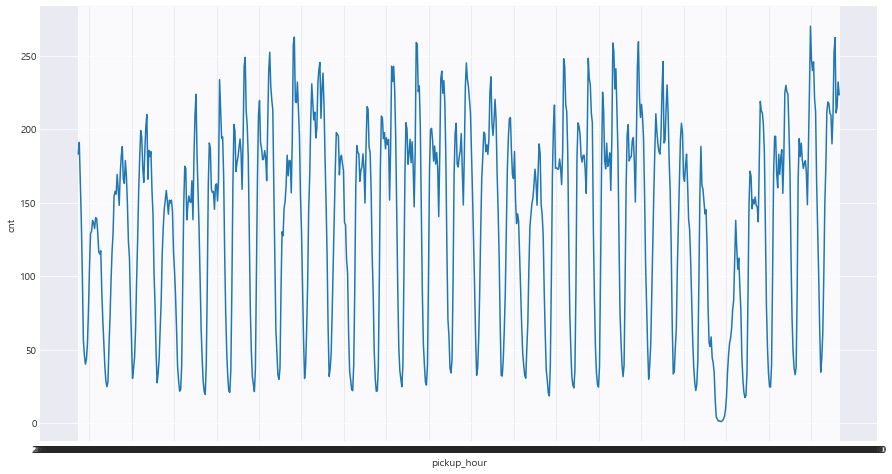

In [17]:
plt.figure(figsize=(15,8))
sns.lineplot(data=mean_cnt)

# 공통질문 

### 1월 한 달간 수요추이
- 급격한 변화가 있었던 특정 날짜의 시간을 찾아보세요. 
- 왜 그랬을까요? 그 이유도 함께 추론해주세요. 


<AxesSubplot:xlabel='pickup_hour', ylabel='cnt'>

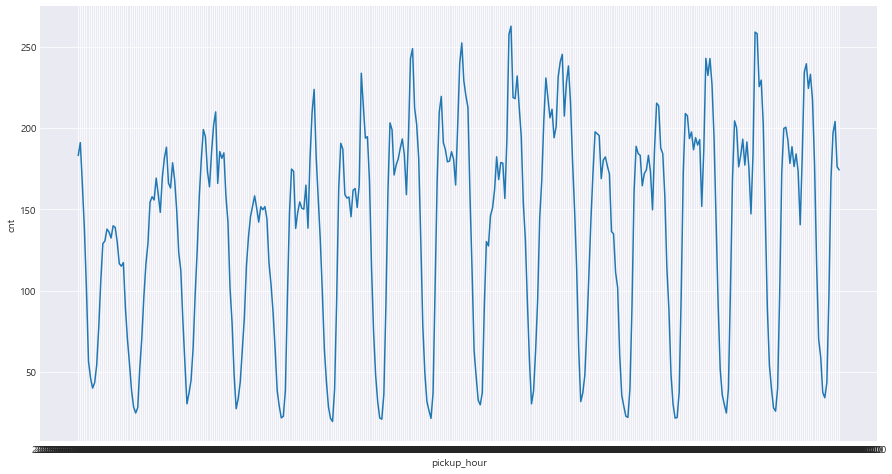

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(data=mean_cnt[:372])

<AxesSubplot:xlabel='pickup_hour', ylabel='cnt'>

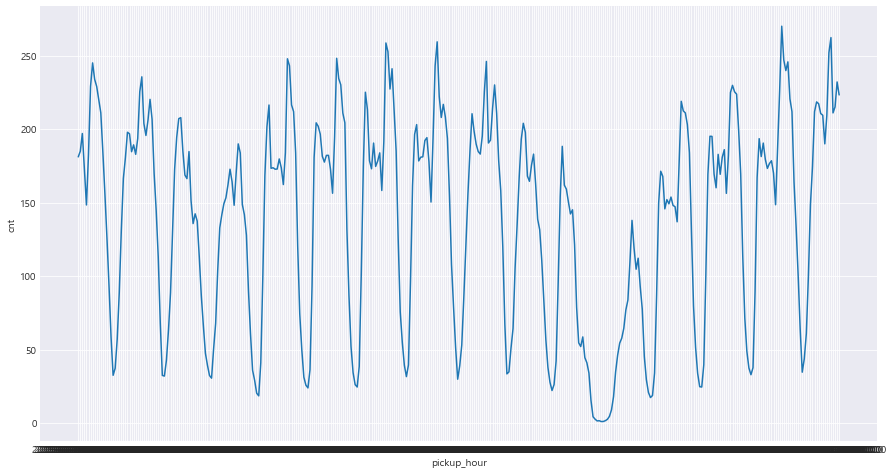

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(data=mean_cnt[372:])

> 1월 27일에 뭔가 일이 생겨서 cnt 수가 평소보다 더 급격하게 떨어졌습니다. cnt가 가장 적은 시간대 뿐만 아니라 평소 같다면 cnt가 많아야 할 시간대에도 cnt 수가 현저히 적습니다.

구글에 "what happened in January 2015 New York"을 검색하면 이 시기(2015.01.26~2015.01.27)에 강한 눈보라가 미국 동부를 지나간 것을 알 수 있습니다.

> Why? **January 2015 North American blizzard**

**링크**<br/>
>https://en.wikipedia.org/wiki/January_2015_North_American_blizzard#Mid-Atlantic_states

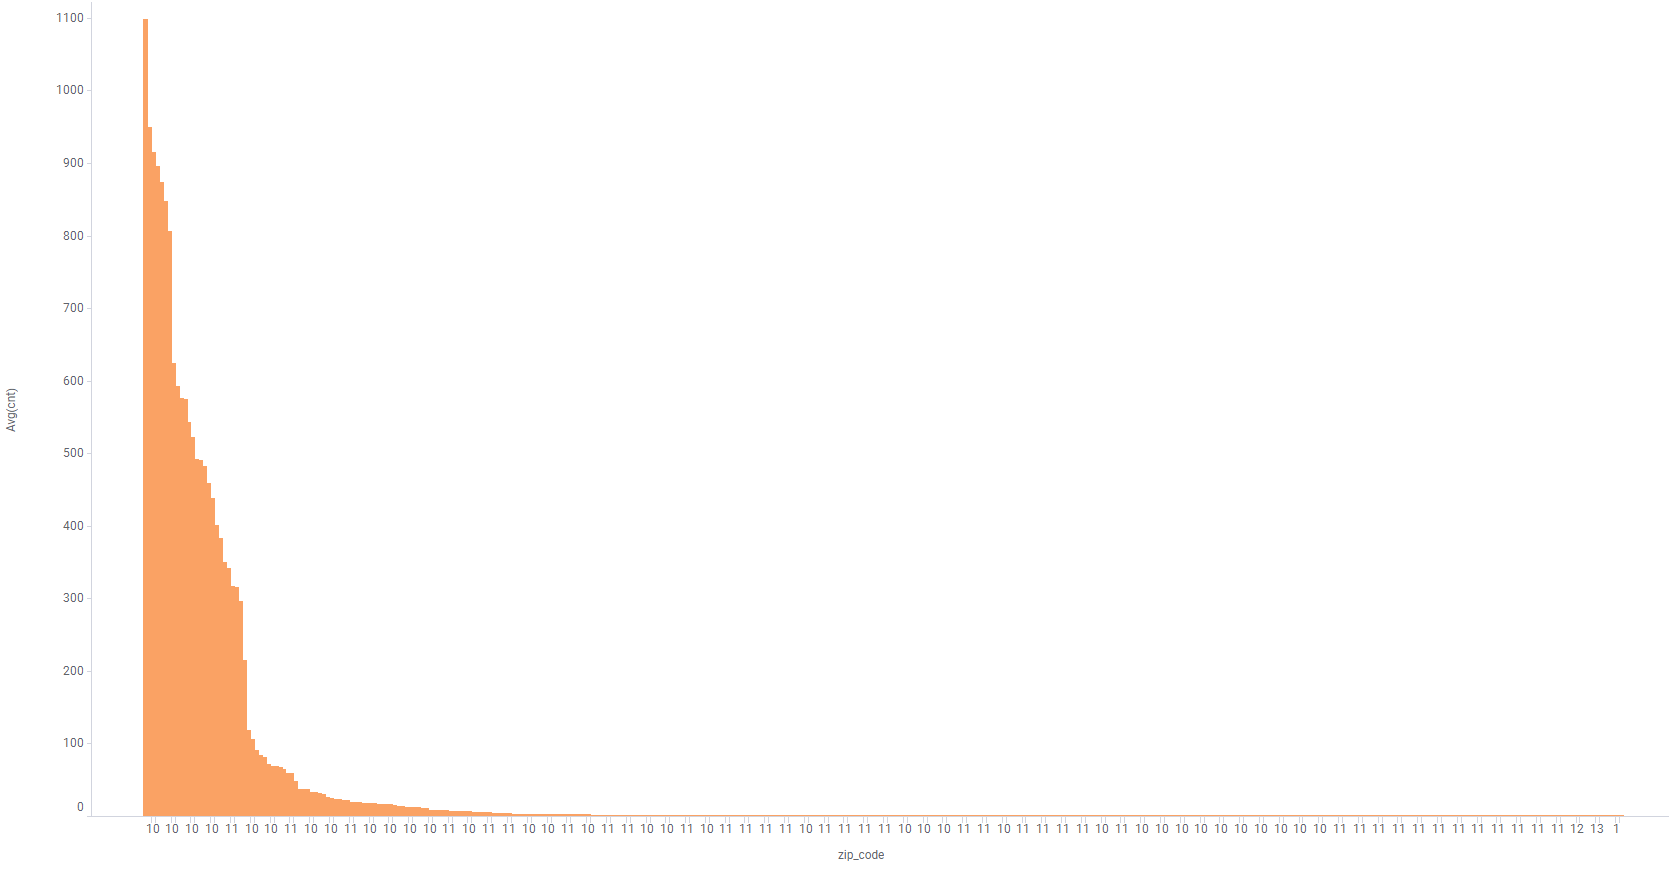

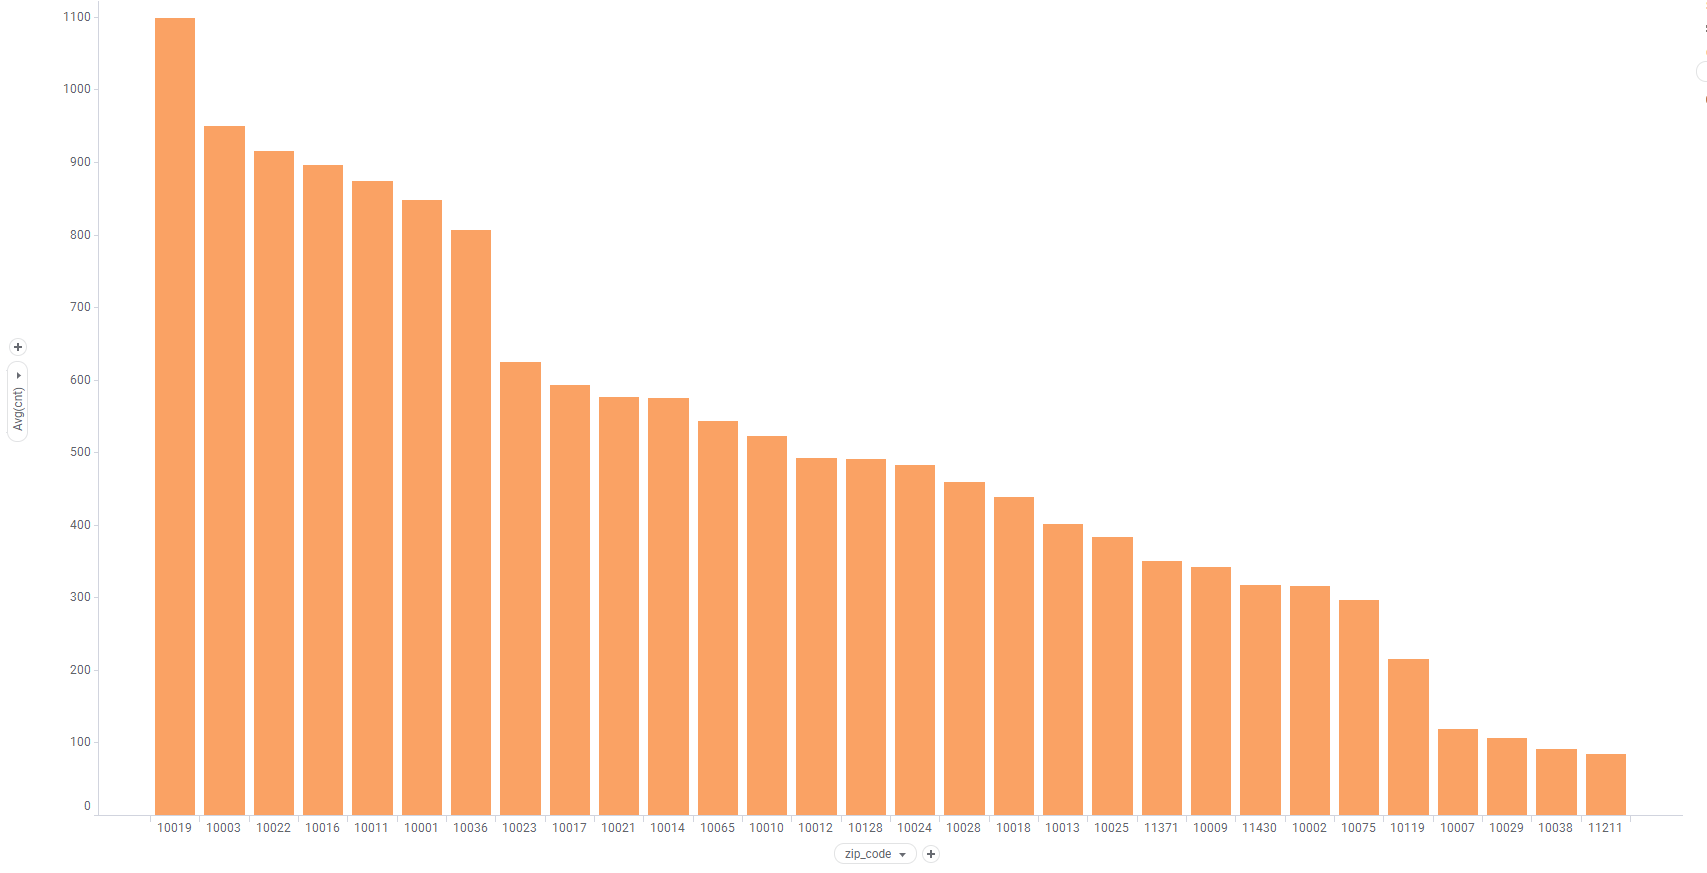

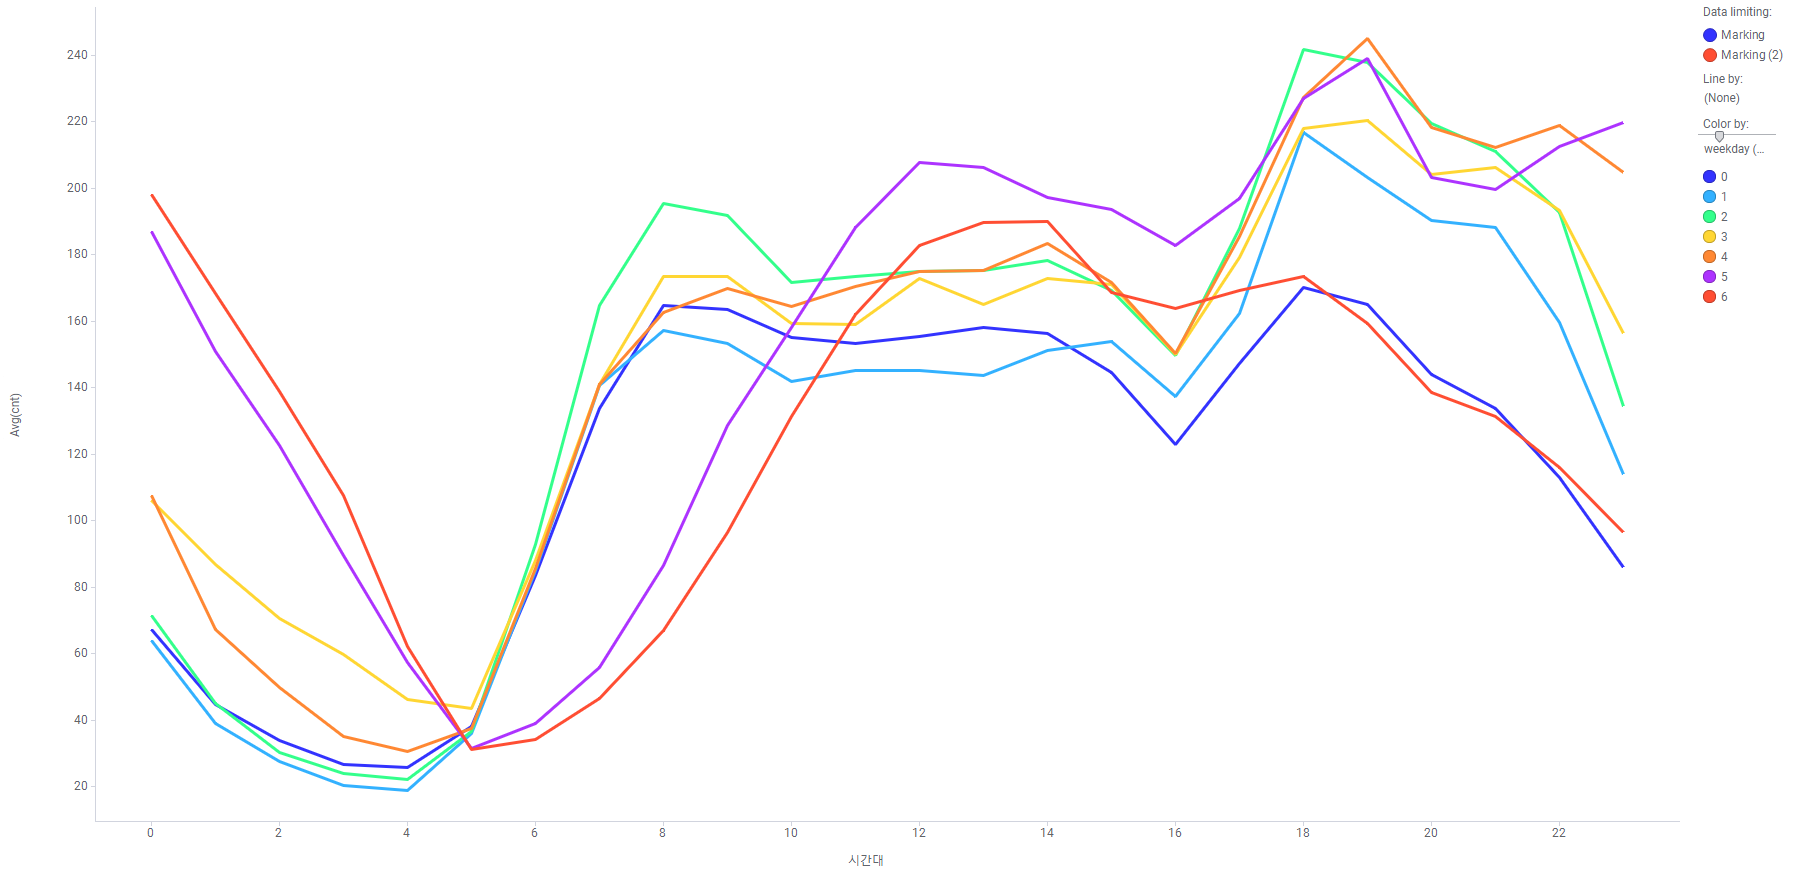

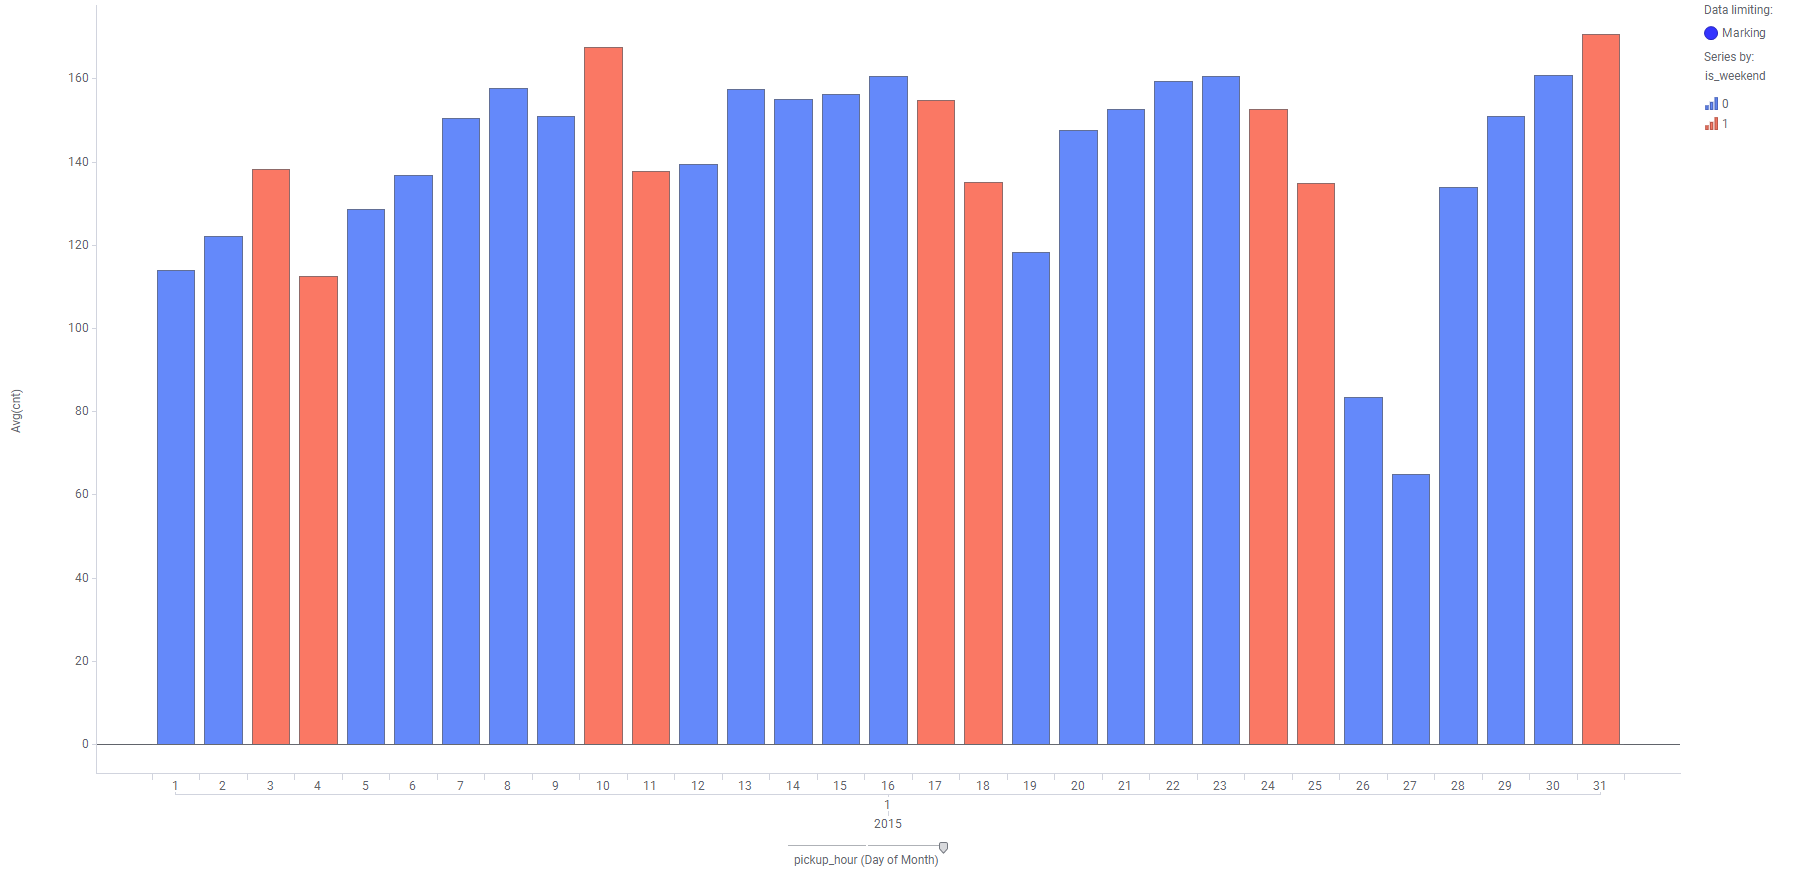

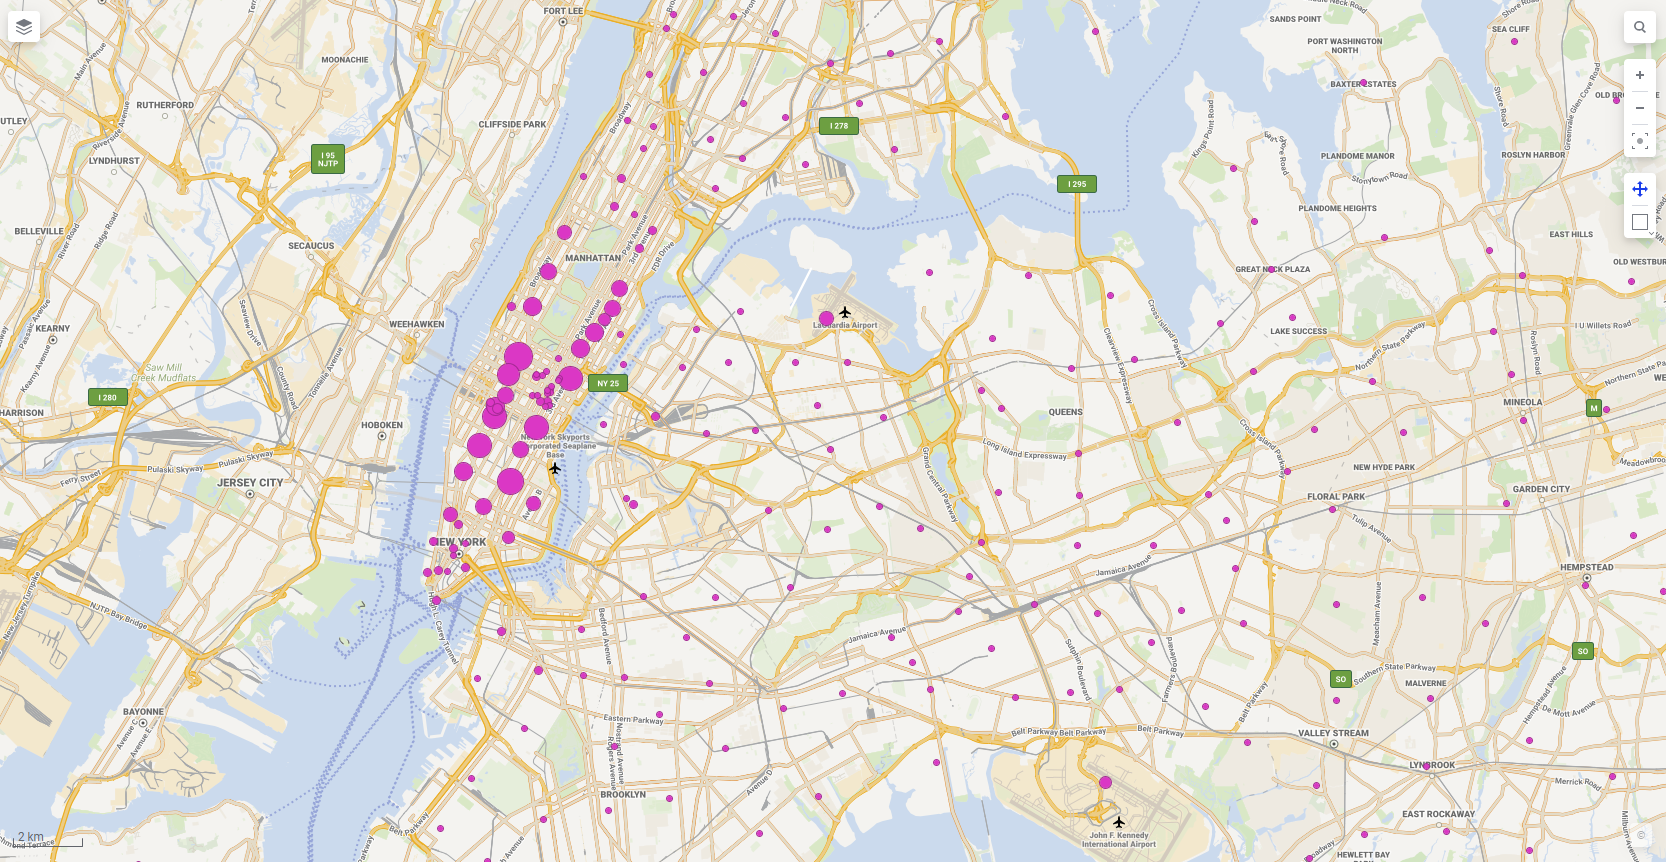

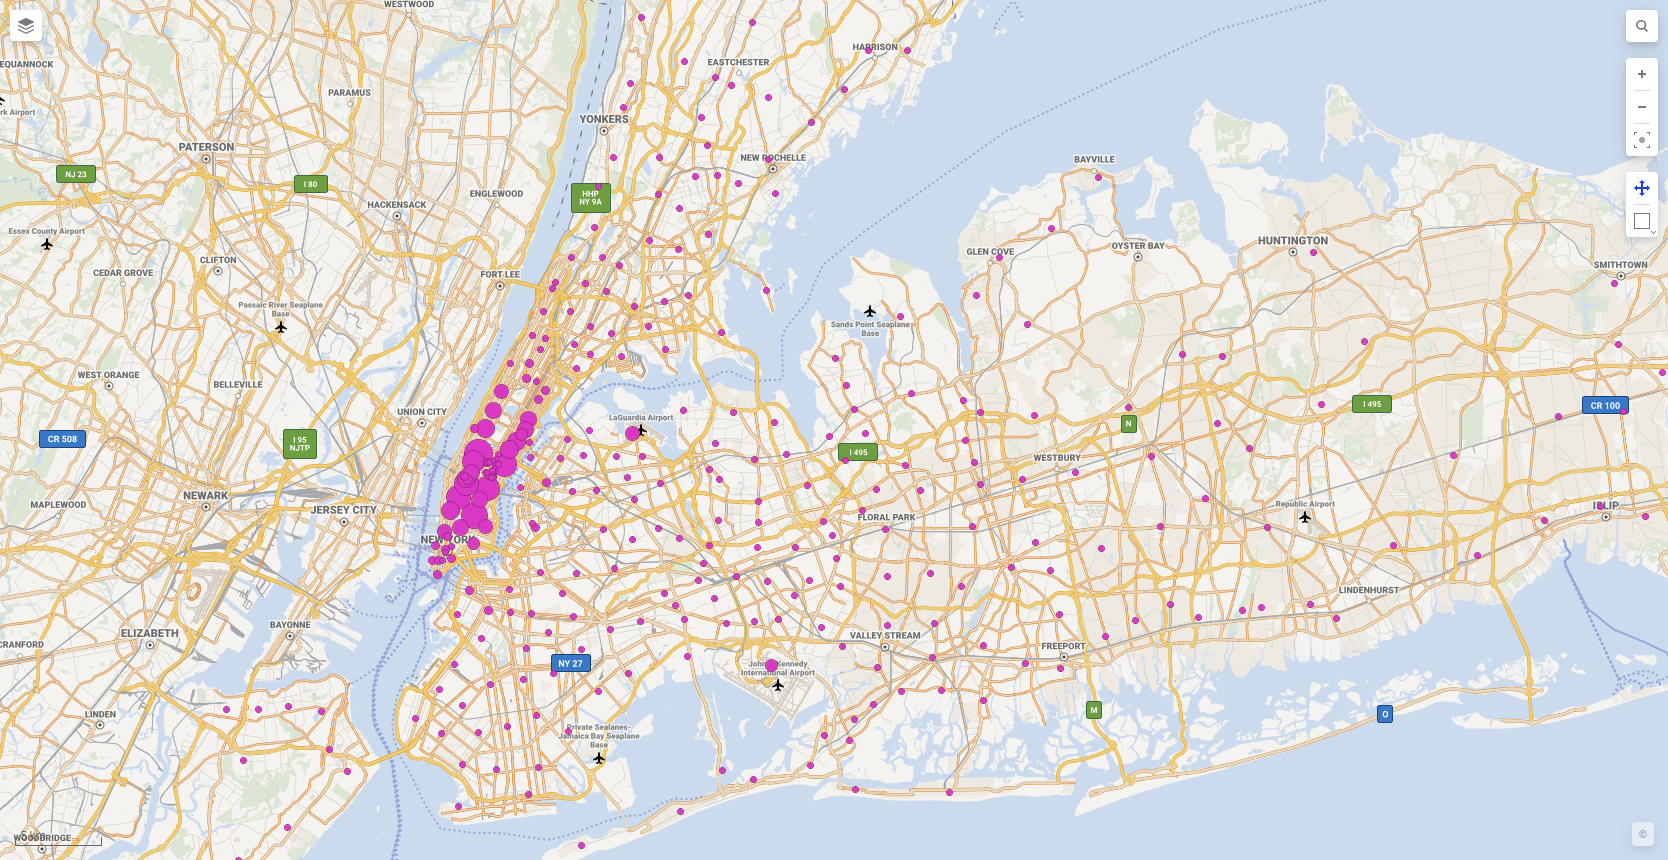